In [6]:
import numpy as np
import matplotlib.pyplot as plt

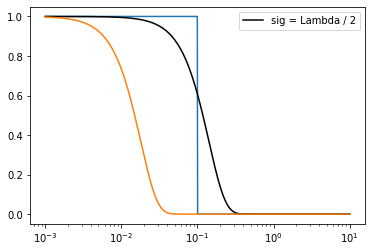

In [97]:
k = np.logspace(-3,1,1000)
Lambda = 0.1
sharp_k = np.ones_like(k)
sharp_k[np.where(k > Lambda)] = 0

gaussian_k_1 = np.exp(-k**2 / 2 / (Lambda)**2)
gaussian_k_2 = np.exp(-k**2 / 2 / (Lambda/(np.sqrt(2 * np.pi) * np.pi))**2)


plt.plot(k, sharp_k)
plt.plot(k, gaussian_k_1, 'k', label='sig = Lambda / 2')
plt.plot(k, gaussian_k_2,)


plt.legend()
plt.xscale('log')

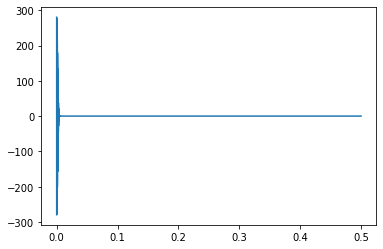

In [45]:
plt.plot(a,b)

In [55]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo_Gaussian, apply_window

# AtLAST
zmin = 1
zmax = 5

Omega_field = 7500 #deg^2

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

Pei = 5.6e4 #Jy / sr
Lambda = 0.01 # 1 / Mpc, usual cut for HI



oup_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_gaussian.npy'%(zmin, zmax, Lambda)
print('outputting to', oup_fname)

outputting to /scratch/users/delon/LIMxCMBL/IHiKappa/zmin_1.00000_zmax_5.00000_Lambda_0.01000_gaussian.npy


In [56]:
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

f_Kkappa = get_f_Kkappa()
a_of_chibs = ccl.scale_factor_of_chi(cosmo, chibs)
z_of_chibs = 1/a_of_chibs - 1


#<I Kappa>
f_KLIM   = get_f_KI()
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)
Ik = d_delta_integral(f_KLIM_windowed, f_Kkappa)

In [100]:
#<ILo Kappa>
ILok = np.zeros((len(ells), len(chibs)), dtype=np.float128)

from tqdm import trange

for chi_idx in trange(len(chibs)):
    chi = chibs[chi_idx]
    f_KLIMLo   = get_f_KILo_Gaussian(external_chi = chi, Lambda=Lambda)
    f_KLIMLo_windowed = apply_window(f_K = f_KLIMLo,
                                     chimin = chimin,
                                     chimax = chimax)
    ILok[:, chi_idx] = d_chib_integral(f_KLIMLo_windowed, f_Kkappa)

100%|██████████| 256/256 [01:07<00:00,  3.80it/s]


In [74]:
from LIMxCMBL.kernels import low_pass_sigma

In [75]:
delta = np.linspace(0, chimax, 10000)

In [104]:
np.sqrt(2*np.pi) / np.sqrt(2 * np.log(2))

2.128934038862452

In [105]:
1/np.pi

0.3183098861837907

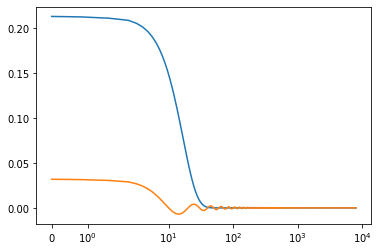

In [98]:
sigma = low_pass_sigma(Lambda)
prefactor = np.sqrt(2 * np.pi) * sigma
plt.plot(delta, prefactor * np.exp(-sigma**2*delta**2 / 2))
plt.plot(delta, Lambda/np.pi * np.sinc(Lambda*delta))

plt.xscale('symlog')

In [101]:
IHi_kappa = Ik - ILok

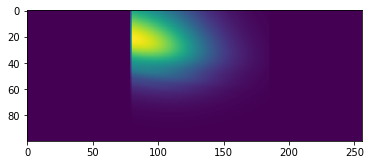

In [106]:
plt.imshow(ILok)

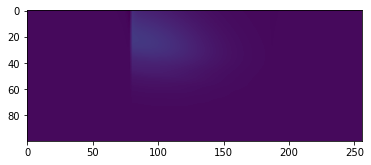

In [107]:
plt.imshow(Ik, vmax = np.max(ILok))

Text(0, 0.5, '$\\log_{10}(\\ell)$')

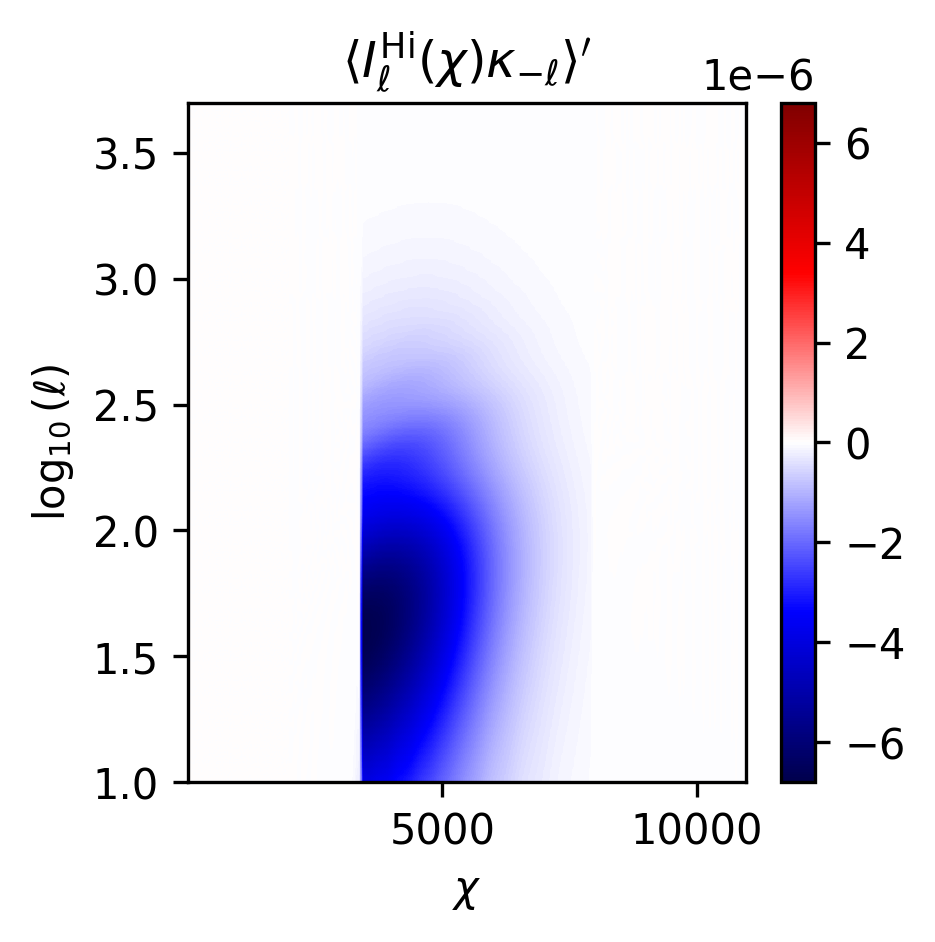

In [111]:
vminmax = np.max(np.abs(IHi_kappa))
plt.figure(figsize=(3,3), dpi=300, facecolor='w',)
 
    
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

# plot data
im = plt.imshow(IHi_kappa, 
           origin='lower',
          cmap = 'seismic',
          vmin = -vminmax,
          vmax =  vminmax,
           aspect = 'auto',
          extent=[chibs[0], chibs[-1], log_ymin, log_ymax])


# cbar = plt.colorbar(im, ticks=[-6e-7, -3e-7,0,3e-7,6e-7])
# cbar.ax.set_ylabel('Linear Scale')
plt.colorbar()

# set bounds
plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")

plt.xlabel(r'$\chi$')
plt.ylabel(r"$\log_{10}(\ell)$")

Text(0, 0.5, '$\\log_{10}(\\ell)$')

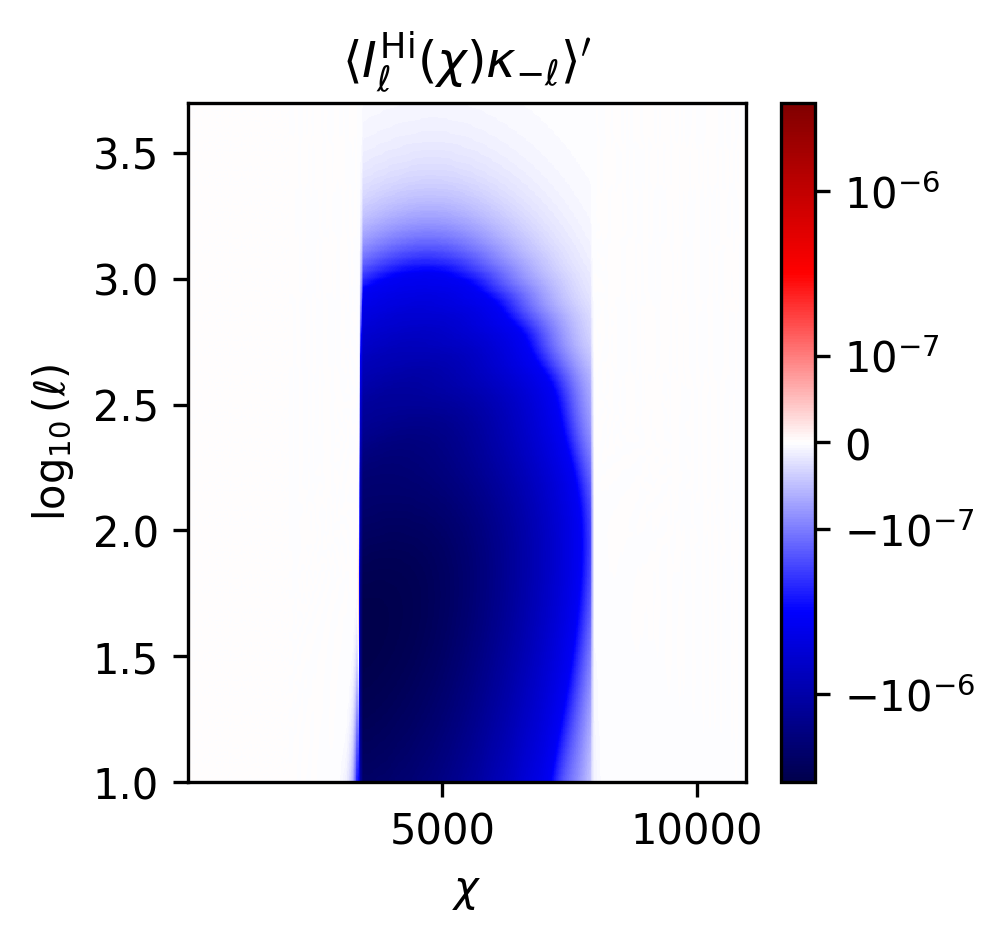

In [112]:
import matplotlib.colors as colors
import numpy as np

vminmax = np.max(np.abs(IHi_kappa))
plt.figure(figsize=(3,3), dpi=300, facecolor='w',)
    
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

lin_factor = 33
linthresh = vminmax/lin_factor
norm = colors.SymLogNorm(linthresh=linthresh, 
                         linscale = np.log10(lin_factor),
                         vmin=-vminmax, 
                         vmax=vminmax, 
                         base=10)

# plot data
im = plt.imshow(IHi_kappa, 
                origin='lower',
                cmap='seismic',
                norm=norm,
                aspect='auto',
                extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

cbar = plt.colorbar(im)


# set bounds
plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")

plt.xlabel(r'$\chi$')
plt.ylabel(r"$\log_{10}(\ell)$")

In [113]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *

In [115]:
dchi = np.mean(np.diff(chibs))

[]

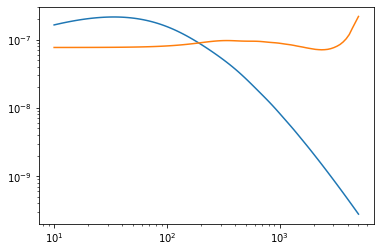

In [117]:
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD)


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)

    
plt.plot(ells, ClKK)
plt.plot(ells, f_N0(ells))
plt.loglog()

In [118]:
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)
I_kappa = d_delta_integral(f_KLIM_windowed, f_Kkappa)

In [119]:
SNR2_per_mode_no_cut = np.zeros_like(ells)
#becuase no cut makes everything diagonal we can do a direct sum

for chib_idx in range(len(chibs)):
    chi = chibs[chib_idx]
    if(chi < chimin or chi > chimax):
        continue
    SNR2_per_mode_no_cut += I_kappa.T[chib_idx]**2 / (Pei/chi**2) * dchi
SNR2_per_mode_no_cut *= 1/(ClKK + f_N0(ells)) 

In [120]:
SNR2_per_mode_no_cut_but_Hi_data = np.zeros_like(ells)
#becuase no cut makes everything diagonal we can do a direct sum

for chib_idx in range(len(chibs)):
    chi = chibs[chib_idx]
    if(chi < chimin or chi > chimax):
        continue
    SNR2_per_mode_no_cut_but_Hi_data += IHi_kappa.T[chib_idx]**2  / (Pei/chi**2) * dchi
SNR2_per_mode_no_cut_but_Hi_data *= 1/(ClKK + f_N0(ells)) 

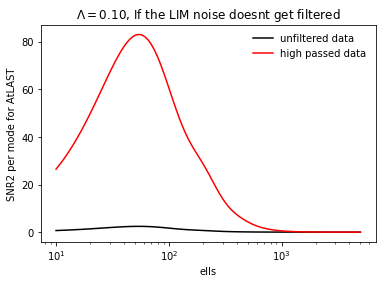

In [121]:
plt.figure(facecolor = 'w')
plt.plot(ells, SNR2_per_mode_no_cut, 'k', label='unfiltered data')
plt.plot(ells, SNR2_per_mode_no_cut_but_Hi_data, 'r', label='high passed data')

plt.xscale('log')
plt.xlabel('ells')
plt.ylabel('SNR2 per mode for AtLAST')
plt.title('$\Lambda=%.2f$, If the LIM noise doesnt get filtered'%(Lambda))
plt.legend(frameon=False)

In [122]:
# hmmm that is weird...